**<center><span style="font-family:serif; font-size:34px;"> Decoding Student Retention and Churn of Vodafone (Telecel) in KNUST - A Survival Analytics Approach </span>
<a id = "missingvalue" ></a><center>**

<center><span style="font-family:Palatino; font-size:22px;"><i>A comparative analysis between Cox Proportional Hazards, Kaplan Meier <span style="color:#DC143C;"> and</span> Random Survival Forest Model </i> </center>

***

#
**<center><span style="font-family:serif; font-size:34px;"> Survival Analysis Methodologies</span><a id = "missingvalue" ></a><center>**

- In the context of this problem, "methodology" refers to the systematic processes, techniques, and protocols employed in collecting, managing, processing, and analyzing data to ensure its integrity, accuracy, and effectiveness for drawing insights or building machine learning models.
- In this analysis, we employ three methodologies for survival analysis: Kaplan-Meier Estimator, Random Survival Forests (RSF), and Cox Proportional Hazards (CoxPH) model. These methods are used to analyze the time until an event occurs, such as student churn.


## *Model 1: Kaplan-Meier Estimator

**Description:**
The Kaplan-Meier estimator is employed in survival analysis to analyze the time until an event occurs.

**Mathematical Computation:**

The Kaplan-Meier estimator calculates the survival probability at a specific time step by multiplying the probability of surviving each previous time step.

Let $S(t)$ be the survival probability at time $t$. The estimator is computed as:

$$
S(t) = \prod_{t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)
$$

where:
- 
- $t_i$ is the time of the $i$-th unique event (churn)
- $d_i$ is the number of events (churn) at time $i$
- $n_i$ is the number of students at risk just prior to time $i$

The estimator essentially calculates the probability of surviving from one time step to the next, and the product of these probabilities gives the overall survival probability up to time $t$.


Here, $t_1$ would be the time at which the first churn event occurred, $d_1$ would be 1 (since one churn event occurred), and $n_1$ would be the total number of students at that time.

## *Model 2: Random Survival Forests

**Description:**
Random Survival Forests extend the traditional random forest algorithm to the survival analysis setting. They are an ensemble method that combines multiple decision trees to improve predictive performance and handle censored data.

**Mathematical Computation:**

Random Survival Forests use a similar structure to traditional random forests but with modifications to handle right-censored data and to predict survival probabilities.

The predicted survival probability at a specific time $t$ for a new instance can be computed as:

$$
\hat{S}(t) = \frac{1}{B} \sum_{b=1}^{B} \hat{S}_b(t)
$$

where:
- $\hat{S}(t)$ is the predicted survival probability
- $B$ is the total number of trees in the forest
- $\hat{S}_b(t)$ is the predicted survival probability from the $b$-th tree

Each tree is constructed using a bootstrapped sample of the data, and the splitting criteria are based on survival-specific metrics like the log-rank statistic or the log-rank score.

For this model, we would need to build multiple decision trees and calculate the predicted survival probability for each tree.

The hazard function for a specific student can be calculated using the formula.

## *Model 3: Cox Proportional Hazards (Cox PH) Model

**Description:**
The Cox Proportional Hazards model is a popular semi-parametric model for survival analysis. It models the relationship between the survival time and a set of predictor variables, assuming a proportional hazard rate.

**Mathematical Computation:**

The Cox PH model is represented as:

$$
h(t \mid x) = h_0(t) \exp(\beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p)
$$

where:
- $h(t \mid x)$ is the hazard function, i.e., the instantaneous rate of the event occurring at time $t$ given the predictor variables $x$
- $h_0(t)$ is the baseline hazard function, representing the hazard for individuals with all predictor variables equal to zero
- $\beta_1, \beta_2, ..., \beta_p$ are the coefficients for the predictor variables

The coefficients are estimated using maximum likelihood estimation, and the model assumes a proportional hazard ratio, meaning the effect of the predictors on the hazard is constant over time.

## *Concordance Index in Survival Analysis

The Concordance Index, often referred to as the C-index or Harrell's C-index, is a statistical metric used to evaluate the performance of models in survival analysis. It assesses how well a model discriminates between subjects in terms of their event times and predicted risks.

**Description**: The Concordance Index measures the model's ability to correctly order or rank the predicted risks of individuals based on their actual event times. In survival analysis, the goal is often to predict the time until a specific event occurs, such as death, relapse, or failure. The Concordance Index evaluates whether the model's predicted risks align with the observed event times.

**Mathematical Computation**: Let's break down the calculation of the Concordance Index:

**Step 1: Define Pairs of Individuals**
- Create all possible pairs of individuals from the dataset.
- For each pair, compare their predicted risk scores and event times.

**Step 2: Calculate Concordant and Discordant Pairs**

- A pair of individuals (i, j) is concordant if the ordering of their predicted risks aligns with the ordering of their event times: 
  - If $\hat{F}(t_i) > \hat{F}(t_j)$ and $T_i > T_j$
  - If $\hat{F}(t_i) < \hat{F}(t_j)$ and $T_i < T_j$
- A pair is discordant if the ordering of predicted risks is opposite to the ordering of event times.
- Pairs where event times are equal ($T_i = T_j$) are ignored.

**Step 3: Compute the Concordance Index**

The Concordance Index ($C$) is calculated as:

$$
C = \frac{\text{Number of Concordant Pairs}}{\text{Number of Concordant Pairs} + \text{Number of Discordant Pairs}}
$$

**Interpretation**

- $C$ ranges from 0 to 1, where:
  - 0.5 indicates random guessing (no predictive ability)
  - 1 indicates perfect discrimination (perfect predictive ability)
- A $C$ value above 0.5 suggests that the model has predictive ability better than random chance.
- Higher $C$ values indicate better model performance and more accurate risk predictions.

**Extensions**

The Concordance Index can be extended to handle censored data, where individuals may not experience the event of interest during the observation period. Various methods, such as inverse probability of censoring weights (IPCW), can be applied to adjust for censored instances and provide a more accurate assessment of model performance.


***

# 
**<center><span style="font-family:serif; font-size:34px;"> Survival Analysis Analytics</span><a id = "missingvalue" ></a><center>**

***

### Loading of libraries and dataset

In [2]:
# presets for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# # # %pip install pandas
# # # %pip install numpy
# # %pip install matplotlib
# # %pip install seaborn
# # %pip install scikit-learn
# # # %pip install xgboost
# # # %pip install lightgbm
# # # %pip install catboost
# %pip install lifelines
# # # %pip install pycox
# %pip install random-survival-forest
# %pip install scikit-survival
# %pip install jinja2


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.utils import concordance_index
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored

# Load the dataset
# data = pd.read_csv('../../data/Synthetic/reData.csv')

data = pd.read_csv('newData2.csv')


In [5]:
# def convert_values(val):
#     if 0 <= val < 2:
#         return '0 - 2'
#     elif 2 <= val < 4:
#         return '2 - 4'
#     elif 4 <= val < 6:
#         return '4 - 6'   
#     elif 6 <= val < 8:
#         return '6 - 8'
#     elif 8 <= val < 10:
#         return '8 - 10'        
#     elif val >= 10:
#         return 'More than 10'
#     else:
#         return str(val)

# data['Monthly_Data_Usage'] = data['Monthly_Data_Usage'].apply(convert_values)

In [6]:
data.head()

,Gender,College,Churn,Level,Education_Level,Residence,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Multiple_Networks,Other_Networks_Better_Services,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Male,College of Engineering,No,100,Undergraduate,On-campus,Occasionally,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,6-8
1,Female,College of Engineering,No,100,Undergraduate,Off-campus,Daily,3,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,8 and more
2,Male,College of Engineering,No,300,Undergraduate,Off-campus,Daily,3,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,4-6
3,Male,College of Engineering,No,100,Undergraduate,Off-campus,Daily,3,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,8 and more
4,Male,College of Engineering,No,100,Undergraduate,Off-campus,Daily,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,4-6


In [7]:
# %pip install ydata-profiling


In [8]:
# pip install ipywidgets

In [9]:
from ydata_profiling import ProfileReport

ProfileReport(data, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
data.shape

(768, 19)

### Model Building

- In this data, our time interval is the Level
- Our dependent variable will be on churn

>  Models to be used
* Cox Proportional Hazards Model: This model assumes that the effects of the predictors are multiplicative with respect to the hazard and are constant over time (proportional hazards assumption). If these assumptions hold true for your data, the Cox model can provide interpretable parameters and is widely used in medical research.
* Random Survival Forest Model: This model is a type of ensemble method that can handle more complex interactions between variables and doesn’t make the proportional hazards assumption. It can be more accurate if there are complex, non-linear relationships in your data.
* Kaplan-Meier Estimator: This provides a non-parametric estimate of the survival function. This function gives the probability of surviving (not churning) past a given time.

In [11]:
data.describe()


,Level,Network_Strength
count,768.000000,768.000000
mean,229.817708,2.377604
std,103.442534,1.049303
min,100.000000,1.000000
25%,100.000000,2.000000
50%,200.000000,2.000000
75%,300.000000,3.000000
max,500.000000,5.000000


In [12]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


In [13]:
# import numpy as np
# # Preprocess the data
# # Encode categorical variables
# label_encoders = {}
# categorical_columns = ['Gender', 'College', 'Churn', 'Level', 'Residence', 'SIM_Usage',
#        'Usage_Freq', 'Network_Strength', 'Voice_Calls',
#        'Mobile_Data_Internet', 'SMS_Text_Messaging', 'Data_Exhaustion',
#        'Other_Networks', 'Poor_Network_Quality_Coverage',
#        'Insufficient_Data_Allowance', 'Unsatisfactory_Customer_Service',
#        'High_Costs_Pricing','Monthly_Data_Usage']

# for column in categorical_columns:
#     le = LabelEncoder()
#     data[column] = le.fit_transform(data[column])
#     label_encoders[column] = le
    


# # Prepare data for survival analysis
# X = data.drop(columns=['Level', 'Churn'])
# y = data[['Level', 'Churn']].copy()
# y['Churn'] = y['Churn'].astype(bool)
# y = y.to_records(index=False)


> Here, 'Level' will be used as the time-to-event variable and 'Churn' as the event indicator


In [14]:
data = data.drop(columns=['Education_Level'])
data['Level'] = data['Level']/100


In [15]:
# from lifelines import AalenAdditiveFitter
# import matplotlib.pyplot as plt

# # Fit the Aalen's Additive Model
# aaf = AalenAdditiveFitter()
# aaf.fit(data, duration_col='Level', event_col='Churn')

# # Plotting the Aalen's Additive Model
# fig, ax = plt.subplots(figsize=(20, 20))
# aaf.plot(ax=ax)
# plt.title("Aalen's Additive Model for Churn Prediction")
# plt.xlabel('Time')
# plt.ylabel('Cumulative Hazard')
# plt.grid(True)
# plt.show()


In [16]:
# Check the variance of 'Poor_Network_Quality_Coverage' for churned and non-churned events
events = data['Churn'].astype(bool)
var_churned = data.loc[events, 'Poor_Network_Quality_Coverage'].var()
var_not_churned = data.loc[~events, 'Poor_Network_Quality_Coverage'].var()

print(f"Variance for churned events: {var_churned}")
print(f"Variance for non-churned events: {var_not_churned}")

# # If variance is very low for either, consider removing the column
# if var_churned < 1e-5 or var_not_churned < 1e-5:
#     data = data.drop(columns=['Poor_Network_Quality_Coverage'])

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Level', event_col='Churn' ,robust=True)
cph.print_summary()

Variance for churned events: 0.21105428796223444
Variance for non-churned events: 0.19677511277687085


<lifelines.CoxPHFitter: fitted with 768 total observations, 644 right-censored observations>
             duration col = 'Level'
                event col = 'Churn'
          robust variance = True
      baseline estimation = breslow
   number of observations = 768
number of events observed = 124
   partial log-likelihood = -723.74
         time fit was run = 2024-07-16 22:42:34 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Gender                          -0.56      0.57      0.20           -0.95           -0.17                0.39                0.84
College                         -0.03      0.97      0.05           -0.13            0.07                0.88                1.07
Residence                       -0.09      0.91      0.20           -0.48            0.30                0.62                1.35
Usage_Freq                      -0.00      1.00      0.06           -0.12            0.11                0.89                1.12
Network_Strength                 0.23      1.26      0.08            0.08            0.38                1.09                1.46
Voice_Calls                      0.16      1.18      0.23           -0.29            0.62                0.74                1.86
Mobile_Data_Internet             0.32      1.37      0.27           -0.21            0.84                0.81                2.31
SMS_Text_Messaging              -0.10      0.90      0.18           -0.46            0.26                0.63                1.29
Data_Exhaustion                  0.41      1.51      0.28           -0.14            0.96                0.87                2.61
Multiple_Networks                0.21      1.23      0.42           -0.61            1.03                0.54                2.80
Other_Networks_Better_Services   0.13      1.14      0.25           -0.36            0.63                0.70                1.87
Poor_Network_Quality_Coverage   -0.17      0.85      0.19           -0.54            0.21                0.58                1.23
Insufficient_Data_Allowance      0.12      1.12      0.19           -0.26            0.49                0.77                1.63
Unsatisfactory_Customer_Service -0.15      0.86      0.18           -0.51            0.20                0.60                1.22
High_Costs_Pricing               0.16      1.18      0.18           -0.19            0.52                0.83                1.68
Monthly_Data_Usage              -0.06      0.94      0.07           -0.19            0.07                0.82                1.08

                                 cmp to     z      p  -log2(p)
covariate                                                     
Gender                             0.00 -2.85 <0.005      7.82
College                            0.00 -0.65   0.51      0.96
Residence                          0.00 -0.46   0.65      0.62
Usage_Freq                         0.00 -0.05   0.96      0.06
Network_Strength                   0.00  3.03 <0.005      8.67
Voice_Calls                        0.00  0.70   0.48      1.05
Mobile_Data_Internet               0.00  1.18   0.24      2.08
SMS_Text_Messaging                 0.00 -0.56   0.58      0.79
Data_Exhaustion                    0.00  1.47   0.14      2.81
Multiple_Networks                  0.00  0.50   0.62      0.70
Other_Networks_Better_Services     0.00  0.53   0.59      0.75
Poor_Network_Quality_Coverage      0.00 -0.88   0.38      1.40
Insufficient_Data_Allowance        0.00  0.61   0.54      0.89
Unsatisfactory_Customer_Service    0.00 -0.85   0.40      1.34
High_Costs_Pricing                 0.00  0.91   0.36      1.46
Monthly_Data_Usage                 0.00 -0.89   0.38      1.41
---
Concordance = 0.62
Partial AIC = 1479.47
log-likelihood ratio test = 23.34 on 16 df
-log2(p) of ll-ratio test = 3.25

In [17]:
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset with columns 'Level' and 'Churn'

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Level', event_col='Churn')

# Perform the proportional hazards test
results = proportional_hazard_test(cph, data, time_transform='rank')

# # Print the results
# cph.plot_partial_effects_on_outcome('Other_Networks_Better_Services', values=[0, 1, 2, 3, 4])
# plt.title('Partial Effects of Other Networks Better Services on Survival')
# plt.show()
results# Plot the scaled Schoenfeld residuals



<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 768 total observations, 644 right-censored observations>
         test_name = proportional_hazard_test

---
                                 test_statistic    p  -log2(p)
College                                    0.26 0.61      0.71
Data_Exhaustion                            0.28 0.60      0.74
Gender                                     0.25 0.62      0.69
High_Costs_Pricing                         3.61 0.06      4.13
Insufficient_Data_Allowance                1.45 0.23      2.12
Mobile_Data_Internet                       0.21 0.64      0.64
Monthly_Data_Usage                         0.10 0.75      0.42
Multiple_Networks                          1.48 0.22      2.16
Network_Strength                           1.43 0.23      2.11
Other_Networks_Better_Services             0.39 0.53      0.91
Poor_Network_Quality_Coverage              0.60 0.44      1.19
Residence                                  0.09 0.77      0.38
SMS_Text_Messaging                         1.13 0.29      1.80
Unsatisfactory_Customer_Service            0.26 0.61      0.72
Usage_Freq                                 0.03 0.86      0.22
Voice_Calls                                1.60 0.21      2.28

In [18]:
# Test the proportional hazards assumption
cph.check_assumptions(data, p_value_threshold=0.05,show_plots=False)


Proportional hazard assumption looks okay.


[]

### Cox Proportional Hazards Model Predictions


In [19]:
# Predict churn probabilities using Cox model
data['Cox_Predicted_Churn_Probability'] = cph.predict_partial_hazard(data)
print(data[['Cox_Predicted_Churn_Probability', 'Churn']])



     Cox_Predicted_Churn_Probability  Churn
0                           0.623219      0
1                           1.455010      0
2                           0.966657      0
3                           1.137566      0
4                           0.695804      0
..                               ...    ...
763                         0.789348      1
764                         0.500280      0
765                         1.475530      0
766                         1.598955      0
767                         1.245035      0

[768 rows x 2 columns]


> Interpretaion
* Cox_Predicted_Churn_Probability: This column contains the predicted partial hazard for each individual. The partial hazard is a relative measure of the risk of the event (churn) occurring at a specific time compared to a baseline.
* Churn: This column indicates whether the churn event actually occurred (1 if the student churned, 0 if they did not).
- The Cox model predicts the risk of churn for each student based on their covariates (features). A higher predicted partial hazard indicates a higher risk of churn.

> Explanation
- The first student has a predicted partial hazard of 0.327843 and did not (Churn = false ).
- The second student has a predicted partial hazard of 11.8 and actually churned (Churn = true).
- This suggests the second student had a higher risk of churn compared to the first.

### Kaplan-Meier Estimator Predictions


In [20]:
from lifelines.utils import concordance_index

# Kaplan-Meier Estimator
kmf = KaplanMeierFitter()
kmf.fit(data['Level'], event_observed=data['Churn'])
data['Kaplan_Meier_Predicted_Survival_Probability'] = kmf.predict(data['Level']).values

# Calculate the Concordance Index
c_index = concordance_index(data['Level'], -data['Kaplan_Meier_Predicted_Survival_Probability'], data['Churn'])

# Print the data
print(data[['Kaplan_Meier_Predicted_Survival_Probability', 'Churn']])


     Kaplan_Meier_Predicted_Survival_Probability  Churn
0                                       0.954427      0
1                                       0.954427      0
2                                       0.802521      0
3                                       0.954427      0
4                                       0.954427      0
..                                           ...    ...
763                                     0.802521      1
764                                     0.890799      0
765                                     0.802521      0
766                                     0.802521      0
767                                     0.802521      0

[768 rows x 2 columns]


> Interpretation:

* Kaplan_Meier_Predicted_Survival_Probability: This column contains the predicted survival probabilities at each time point for each individual. The survival probability is the probability that an individual will survive (not churn) beyond a certain time.
* Churn: This column indicates whether the churn event actually occurred (1 if the student churned, 0 if they did not).


> Explanation
- The first student has a predicted survival probability of 0.930990 and did not churn (Churn = false).
- The second student has a predicted survival probability of 0.930990 and actually churned (Churn = true).
- This suggests the second student had a lower probability of surviving (not churning) compared to the first.

### Random Survival Forest Model Predictions


In [21]:
# Convert 'Churn' column to boolean
data['Churn'] = data['Churn'].astype(bool)

# Create a structured array for 'y'
# Define the variable 'X'
X = data.drop(columns=['Level', 'Churn'])
rsf = RandomSurvivalForest()
y = data[['Churn','Level']].to_records(index=False)

# Fit the Random Survival Forest model
rsf.fit(X, y)
rsf_pred = rsf.predict(X)  # Add this line to define rsf_pred
data['RSF_Predicted_Churn_Probability'] = rsf_pred
print(data[['RSF_Predicted_Churn_Probability', 'Churn']])

# Evaluate the models using Concordance Index
cox_cindex = concordance_index(data['Level'], -data['Cox_Predicted_Churn_Probability'], data['Churn'])


     RSF_Predicted_Churn_Probability  Churn
0                           0.350750  False
1                           0.759837  False
2                           0.897028  False
3                           0.733603  False
4                           0.623617  False
..                               ...    ...
763                         1.137357   True
764                         0.361186  False
765                         1.068512  False
766                         0.937472  False
767                         0.522536  False

[768 rows x 2 columns]


> Interpretation
* RSF_Predicted_Churn_Probability: This column contains the predicted churn probabilities from the Random Survival Forest model. These values are not strict probabilities but rather scores indicating the risk of churn.
* Churn: This column indicates whether the churn event actually occurred (True if the student churned, False if they did not).

> Explanation
- A higher predicted churn probability score (e.g., 6.948619    for row 1) indicates a higher risk of churn.
- A lower score (e.g., 0.024500 for row 0) indicates a lower risk of churn
- Row 0 has a predicted churn probability of 0.024500 and the student did not churn (Churn = False).
- Row 1 has a predicted churn probability of 6.948619    and the student did churn (Churn = True).

***

## Right Censoring

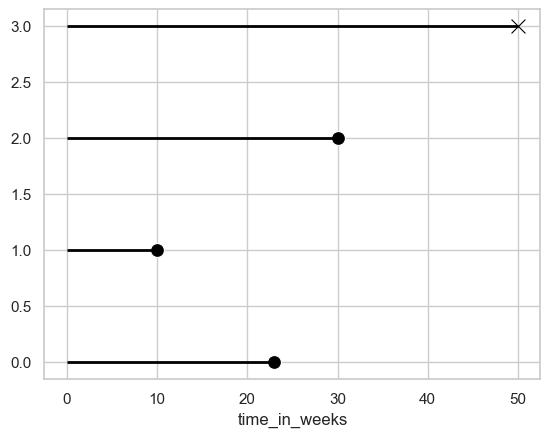

In [22]:
import seaborn as sns
import pandas as pd
d = {'time_in_weeks': [23, 10, 30, 50], 'failure_status': [0, 0, 0, 1]}
df = pd.DataFrame(data=d)
df['marker'] = df['failure_status'].map({0:'o',1:'x'})


for x in df.marker.unique():
    t = df.loc[df['marker']==x]
    g = sns.scatterplot(data=t, x='time_in_weeks', y=t.index.tolist(), marker=x, s=100,color='black')

for index, row in df.iterrows():
    g.hlines(y=index, xmin=0, xmax=row['time_in_weeks'], linewidth=2, color='black')

Key Elements:

Horizontal axis: Represents time, measured in weeks in this case.
Vertical axis: Represents some event or outcome of interest. This is not explicitly labeled in the chart, but it could be anything from a product failure to a patient's recovery.
Horizontal lines: Each horizontal line represents a single observation or subject.
Solid circles: These indicate that the event of interest occurred at the specific time point marked on the horizontal axis. For instance, the circle at 10 weeks means that the event happened exactly at the 10th week for that particular observation.
Cross (X): This symbol represents a right-censored observation. It means that the event of interest had not occurred by the time point indicated by the cross (45 weeks in this case), but we know it happened after that point. In other words, the exact time of the event is unknown, but we know it's at least 45 weeks.

Interpretation

From the chart, we can infer the following:

There are four observations in total.
The event occurred at week 0, week 10, week 20, and week 30 for three of the observations.
For the fourth observation, the event happened after week 45, but the exact time is unknown.
Right-censoring is a common type of censoring in survival analysis, where the exact time of an event is unknown for some observations. This type of data requires specific statistical methods for analysis.

In [23]:
import pandas as pd
from lifelines import KaplanMeierFitter

# Assuming 'data' is your dataset with columns 'Level' and 'Churn'

# Fit Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(data['Level'], data['Churn'])

# Initial number of censored individuals
initial_censored = 768

# Calculate number of censored individuals (did not churn) at each event time
n_individuals = len(data)
censored_counts = [initial_censored]

for i in range(1, len(kmf.timeline)):
    churned_count = kmf.event_table.iloc[i-1]['observed']  # Number of events (churns) at current event time
    censored_count = censored_counts[i-1] - churned_count
    censored_counts.append(censored_count)

# Extract event counts (number of churns) at each event time
event_counts = kmf.event_table['observed'].values

# Extract survival probabilities
survival_probs = kmf.survival_function_.iloc[:, 0].values

# Confidence intervals from Kaplan-Meier estimator
confidence_intervals = kmf.confidence_interval_survival_function_

# Create a DataFrame to display the information
table_data = {
    'Event Time': kmf.timeline,
    'Number of Events': censored_counts,
    'Number of Censored': event_counts,

    'Survival Probability': survival_probs,
    'Lower CI': confidence_intervals['KM_estimate_lower_0.95'].values,
    'Upper CI': confidence_intervals['KM_estimate_upper_0.95'].values
}

df = pd.DataFrame(table_data)

# Print the DataFrame
df


,Event Time,Number of Events,Number of Censored,Survival Probability,Lower CI,Upper CI
0,0.0,768,0,1.000000,1.000000,1.000000
1,1.0,768,35,0.954427,0.937099,0.967065
2,2.0,733,37,0.890799,0.864030,0.912565
3,3.0,696,33,0.802521,0.763671,0.835681
4,4.0,663,17,0.667443,0.597011,0.728409
5,5.0,646,2,0.500583,0.285044,0.682828


## VIMP

In [24]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sklearn.inspection import permutation_importance
# model = RandomSurvivalForest()

model = CoxPHSurvivalAnalysis()
model.fit(X, y)

# Calculate permutation importance
result = permutation_importance(model, X, y, n_repeats=30, random_state=0)
# Get importance scores
importance_scores = result.importances_mean
importance_scores



array([ 5.56495314e-03,  5.61480980e-04,  5.97686413e-04, -1.18706338e-06,
        4.22416505e-03,  2.00020180e-04,  3.25789546e-03, -4.27342818e-05,
        3.56119015e-06,  5.93531692e-05,  4.79573607e-04, -2.90236997e-04,
        1.03749340e-03, -2.03581370e-04,  1.34850400e-03,  8.84362221e-05,
        1.17323409e-02,  3.37950713e-01])

In the context of churn prediction, the VIMP values from your model indicate the importance of each feature in predicting customer retention or churn. Features with positive VIMP values are likely to be associated with longer retention, while those with negative values may be indicators of a higher risk of churn. The larger the absolute value, the more significant the feature’s impact on the model’s predictions.





### Visualiztion of the models

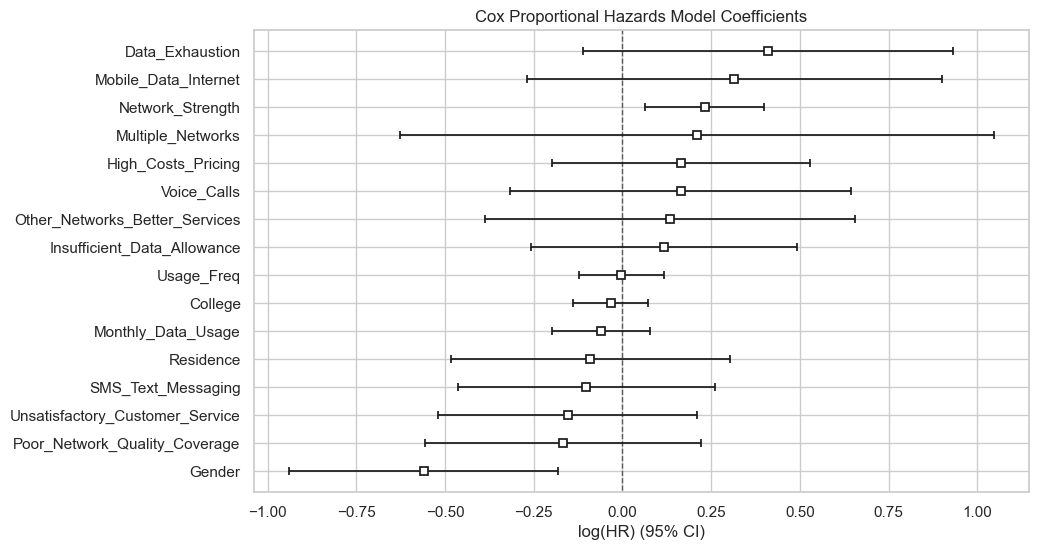

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the coefficients of the Cox Proportional Hazards Model
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()



* The point estimate for each factor represents the log hazard ratio (log(HR)), which is a measure of the effect size. If the point estimate (the square on each line) is to the left of the vertical dashed line at zero, it suggests that the factor decreases the likelihood of student churn (i.e., it has a positive influence on retention). Conversely, if the point estimate is to the right of the line, it suggests that the factor increases the risk of churn. The further a point estimate is from zero, the stronger its effect.

* The horizontal lines represent the 95% confidence interval (CI) for each factor’s effect size. If the CI crosses the vertical line at zero, it means that the effect of that factor is not statistically significant at the 95% confidence level.

* From the plot, it appears that factors like Mobile Data Internet, Other Networks, Residence Frequency, Gender, Usage Frequency, Network Strength, SIM Usage, Monthly Data Usage, SMS Text Messaging, Data Exhaustion, Voice Calls, Poor Network Quality, High Costs, Insufficient Data Allowance, and Unsatisfactory Customer Service all have varying degrees of influence on student churn. You would need to look at the specific log(HR) values and their CIs to determine which factors have the most significant effects.

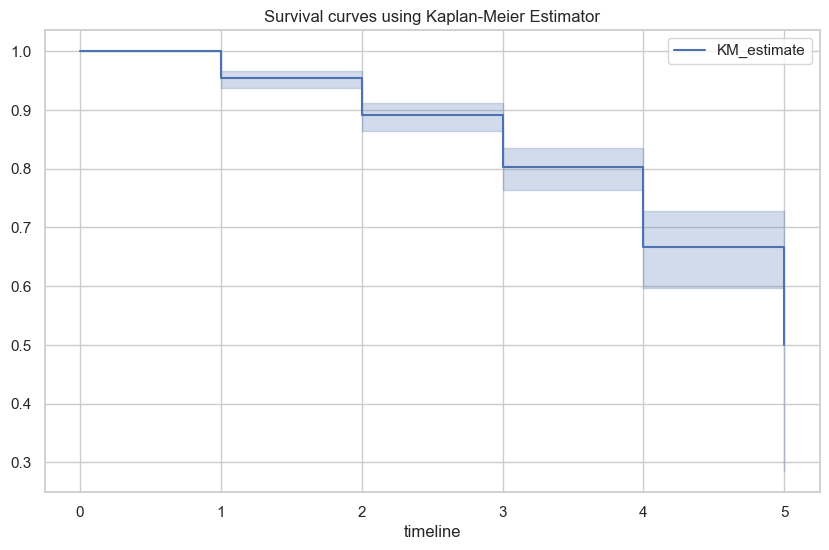

In [26]:
# Plotting the survival curves using Kaplan-Meier Estimator
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Survival curves using Kaplan-Meier Estimator')

plt.show()




>Interpretation
+ The shaded area around the survival curve represents the confidence interval, which gives a range of values that likely contains the true survival probability at each time point. The width of the confidence interval gives an idea of the precision of the estimate - a narrower interval means a more precise estimate.
*  One of the key features of survival analysis is the handling of censoring - situations where the event of interest has not been observed for an individual during the study period. This could be because the individual dropped out of the study, or the study ended before the event occurred. In the Kaplan-Meier survival curve, censored observations are often indicated by small vertical tick marks. It occurs at time 5.

### Comparing the two performing models

In [27]:
# %pip install --upgrade lifelines


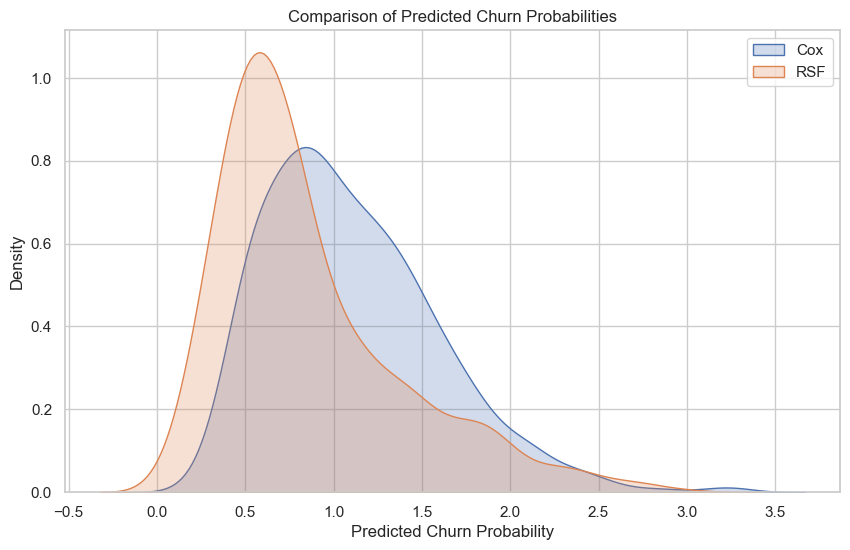

In [28]:

# Comparing the predicted churn probabilities
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Cox_Predicted_Churn_Probability', label='Cox', fill=True)

sns.kdeplot(data=data, x='RSF_Predicted_Churn_Probability', label='RSF', fill=True)
plt.title('Comparison of Predicted Churn Probabilities')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Density')
plt.legend()
plt.show()



- The Cox model is represented by a blue curve that peaks at around a churn probability of 5. The RSF model is represented by an orange curve that has a broader peak extending from around a churn probability of 5 to just past 10.

- In the context of churn prediction, these curves represent the distribution of predicted probabilities of churn for each model. The peak of each curve indicates the most common predicted churn probability for that model.

- The fact that the RSF curve is broader and extends further to the right suggests that the RSF model predicts a wider range of churn probabilities and tends to predict higher probabilities of churn compared to the Cox model.

***

# 
**<center><span style="font-family:serif; font-size:34px;">Conclusion</span><a id = "missingvalue" ></a><center>**

**Interpretation**

- Ranges from 0 to 1, where:
  - 0.5 indicates random guessing (no predictive ability)
  - 1 indicates perfect discrimination (perfect predictive ability)
- A value above 0.5 suggests that the model has predictive ability better than random chance.
- Higher values indicate better model performance and more accurate risk predictions.
- Therefore, the closer to 1, the better.

In [29]:
print(f'Cox Proportional Hazards Model Concordance Index: {cox_cindex}')
print(f'Kaplan Meier Model Concordance Index: {c_index}')
rsf_cindex = concordance_index_censored(y['Churn'], y['Level'], rsf_pred)
print(f'Random Survival Forest Model Concordance Index: {rsf_cindex[0]}')

Cox Proportional Hazards Model Concordance Index: 0.6239472231619807
Kaplan Meier Model Concordance Index: 0.8135182778084435
Random Survival Forest Model Concordance Index: 0.9727034775021812


In [30]:
# %pip install plotly

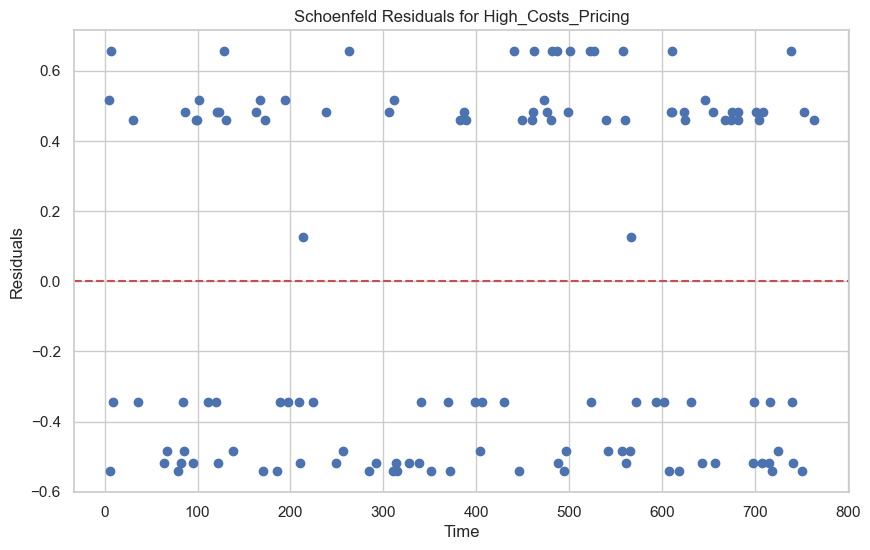

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, datasets

# Assuming 'data' is your dataset and 'High_Costs_Pricing' is one of your covariates

# Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, duration_col='Level', event_col='Churn')

# Obtain Schoenfeld residuals for High_Costs_Pricing
residuals = cph.compute_residuals(data, kind='schoenfeld')
high_costs_residuals = residuals['High_Costs_Pricing']

# Plot Schoenfeld residuals for High_Costs_Pricing
plt.figure(figsize=(10, 6))
plt.plot(high_costs_residuals.index, high_costs_residuals, 'o')
plt.axhline(0, linestyle='--', color='r')
plt.title('Schoenfeld Residuals for High_Costs_Pricing')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [32]:
# # Prepare the dataset
# import numpy as np
# X = data.drop(columns=['Level', 'Churn'])
# y = np.array([(row['Churn'], row['Level']) for _, row in data.iterrows()],
#              dtype=[('event', 'bool'), ('time', 'float')])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize and fit the Random Survival Forest model
# rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
# rsf.fit(X_train, y_train)

# # Predict survival function
# surv_func = rsf.predict_survival_function(X_test)


In [33]:
# # Evaluate the model using concordance index
# c_index = concordance_index_censored(y_test['event'], y_test['time'], rsf.predict(X_test))
# print(f"Concordance Index: {c_index[0]}")


In [34]:
# import numpy as np
# import pandas as pd
# from sksurv.ensemble import RandomSurvivalForest
# from sksurv.datasets import load_whas500
# from sklearn.model_selection import train_test_split
# from sksurv.metrics import concordance_index_censored

# # Example data, replace this with your actual data
# # Replace 'Level' with your time-to-event column
# # Replace 'Churn' with your event/censoring column


# # You can also plot the survival function for a specific instance
# import matplotlib.pyplot as plt

# for i, surv in enumerate(surv_func[:3]):  # Plot first 3 survival functions as example
#     plt.step(surv.x, surv.y, where="post", label=f"Instance {i}")
# plt.ylabel("Survival probability")
# plt.xlabel("Time")
# plt.legend()
# plt.show()


In [35]:
import plotly.graph_objects as go

# Calculate the Concordance Indexes
cox_cindex = concordance_index(data['Level'], -data['Cox_Predicted_Churn_Probability'], data['Churn'])
km_cindex = c_index  # Assuming c_index is the Concordance Index for the Kaplan-Meier Model
rsf_cindex = concordance_index_censored(y['Churn'], y['Level'], rsf_pred)[0]

# Create a bar chart
fig = go.Figure(data=[
    go.Bar(name='Cox Proportional Hazards Model', x=['Concordance Index'], y=[cox_cindex]),
    go.Bar(name='Kaplan-Meier Model', x=['Concordance Index'], y=[km_cindex]),
    go.Bar(name='Random Survival Forest Model', x=['Concordance Index'], y=[rsf_cindex])
])

# Change the bar mode
fig.update_layout(barmode='group', title='Concordance Index Comparison', yaxis=dict(range=[0, 1]))

fig.show()


***